In [150]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
from tqdm import tqdm

In [151]:
path='tweets (2)'

In [152]:
df = pd.read_json(path,lines=True)

In [153]:
df.columns

Index(['_id', 'id', 'id_str', 'conversation_id', 'datetime', 'datestamp',
       'timestamp', 'user_id', 'user_id_str', 'username', 'name', 'place',
       'timezone', 'mentions', 'reply_to', 'urls', 'photos', 'video',
       'thumbnail', 'tweet', 'lang', 'hashtags', 'cashtags', 'replies_count',
       'retweets_count', 'likes_count', 'link', 'retweet', 'retweet_id',
       'retweet_date', 'user_rt', 'user_rt_id', 'quote_url', 'near', 'geo',
       'source', 'translate', 'trans_src', 'trans_dest'],
      dtype='object')

In [154]:
reply_filter = df.reply_to.str.len()>0
df2 = df[reply_filter]

In [155]:
df2

,_id,id,id_str,conversation_id,datetime,datestamp,timestamp,user_id,user_id_str,username,...,retweet_date,user_rt,user_rt_id,quote_url,near,geo,source,translate,trans_src,trans_dest
0,{'$numberLong': '1309405596886671360'},{'$numberLong': '1309405596886671360'},1309405596886671360,1309392711217229824,2020-09-25 08:13:16+00:00,2020-09-25,2020-12-03 08:13:16,{'$numberLong': '1261843510346596352'},1261843510346596352,natalie72552453,...,,,,,,,,,,
1,{'$numberLong': '1238164596332077056'},{'$numberLong': '1238164596332077056'},1238164596332077056,1238162808283561984,2020-03-12 18:06:58+00:00,2020-03-12,2020-12-03 18:06:58,755028775,755028775,gr3gor_g3,...,,,,,,,,,,
2,{'$numberLong': '1234631543630581760'},{'$numberLong': '1234631543630581760'},1234631543630581760,1234357113620717568,2020-03-03 00:07:53+00:00,2020-03-03,2020-12-03 00:07:53,{'$numberLong': '1231937133528653826'},1231937133528653824,uchiwacz,...,,,,,,,,,,
7,{'$numberLong': '1316408978927226881'},{'$numberLong': '1316408978927226881'},1316408978927226880,1316285915665518592,2020-10-14 16:02:12+00:00,2020-10-14,2020-12-03 16:02:12,{'$numberLong': '811512110698074112'},811512110698074112,mypole_star,...,,,,,,,,,,
8,{'$numberLong': '1245456089736531969'},{'$numberLong': '1245456089736531969'},1245456089736531968,1245355850241396736,2020-04-01 21:00:45+00:00,2020-04-01,2020-12-03 21:00:45,2494875673,2494875673,patrick22s,...,,,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118668,{'$numberLong': '935458786986332160'},{'$numberLong': '935458786986332160'},935458786986332160,935442603495043072,2017-11-28 10:42:09+00:00,2017-11-28,2020-12-03 10:42:09,544303701,544303701,emk311,...,,,,,,,,,,
118669,{'$numberLong': '930365516874702848'},{'$numberLong': '930365516874702848'},930365516874702848,930360638571913216,2017-11-14 09:23:19+00:00,2017-11-14,2020-12-03 09:23:19,{'$numberLong': '775708706256351232'},775708706256351232,swift_castle,...,,,,,,,,,,
118671,{'$numberLong': '919186993413873664'},{'$numberLong': '919186993413873664'},919186993413873664,919110848513179648,2017-10-14 13:03:51+00:00,2017-10-14,2020-12-03 13:03:51,{'$numberLong': '850967443593973761'},850967443593973760,pawelprusinski,...,,,,,,,,,,
118672,{'$numberLong': '843878552407891969'},{'$numberLong': '843878552407891969'},843878552407891968,843830432315686912,2017-03-20 17:35:00+00:00,2017-03-20,2020-12-03 17:35:00,3410801362,3410801362,kgb08maria,...,,,,,,,,,,


In [156]:
texts = pd.DataFrame(df2.tweet).reset_index()

In [157]:
texts

,index,tweet
0,0,@morz_w @batofthedungeon Tak to też słyszałam....
1,1,"@ZenekTonieten W okręgu którym mieszkam, nazwi..."
2,2,@lkwarzecha Polacy sie jakimis kaszlami nie pr...
3,7,@stepien_antoni Kup 1kg askorbinianu sodu po ł...
4,8,@JakubMokotow @spanish77029129 @tojabogdan @ma...
...,...,...
70316,118668,"@kontrowersje Czy to prawda, że aparatura z se..."
70317,118669,"@StKarczewski A ja chciałabym, żeby w W-wie pr..."
70318,118671,@tvn24 dac powyzki i jednoczesnie zabrac przyc...
70319,118672,@marcin_kedryna @robertol04 zaraz mi sie przy...


# Filter

In [158]:
def count_tags(text,sign):
    i = 0
    for word in text.split():
        if word.startswith(sign):
            i+=1
    return i

In [159]:
filtered = texts.copy()
min_len = 30
max_hash_tags = 3
max_mension_tags = 5
for i, text in tqdm(enumerate(texts['tweet'])):
    if len(text.split()) < min_len: #Drop to short tweets
        filtered=filtered.drop(i)
    elif count_tags(text,"#") > max_hash_tags: #Drop if there are too many hashtags
        filtered=filtered.drop(i)
    elif count_tags(text,"@") > max_mension_tags: #Drop if there are too many hashtags
        filtered=filtered.drop(i)
    #elif text.startswith('@'):
    #    filtered=filtered.drop(i)
        


0it [00:00, ?it/s]
14it [00:00, 107.69it/s]
30it [00:00, 116.53it/s]
46it [00:00, 125.09it/s]
66it [00:00, 138.86it/s]
83it [00:00, 145.06it/s]
97it [00:00, 138.81it/s]
112it [00:00, 141.19it/s]
126it [00:00, 122.36it/s]
139it [00:01, 111.71it/s]
151it [00:01, 111.53it/s]
163it [00:01, 113.62it/s]
177it [00:01, 117.99it/s]
189it [00:01, 112.27it/s]
201it [00:01, 94.03it/s] 
213it [00:01, 99.55it/s]
227it [00:01, 108.75it/s]
239it [00:01, 111.59it/s]
251it [00:02, 113.97it/s]
263it [00:02, 113.75it/s]
275it [00:02, 114.89it/s]
287it [00:02, 113.73it/s]
300it [00:02, 117.84it/s]
314it [00:02, 121.78it/s]
327it [00:02, 124.13it/s]
340it [00:02, 121.94it/s]
353it [00:02, 119.45it/s]
366it [00:03, 122.09it/s]
379it [00:03, 116.67it/s]
391it [00:03, 116.61it/s]
404it [00:03, 118.68it/s]
416it [00:03, 116.30it/s]
431it [00:03, 124.10it/s]
448it [00:03, 132.19it/s]
463it [00:03, 134.49it/s]
477it [00:03, 134.15it/s]
491it [00:04, 128.37it/s]
504it [00:04, 123.35it/s]
517it [00:04, 124.21it/s]

5209it [00:31, 232.11it/s]
5234it [00:31, 229.37it/s]
5263it [00:31, 242.26it/s]
5288it [00:31, 217.14it/s]
5321it [00:31, 238.28it/s]
5353it [00:31, 254.98it/s]
5380it [00:31, 255.63it/s]
5407it [00:31, 242.95it/s]
5433it [00:31, 233.78it/s]
5457it [00:32, 231.52it/s]
5481it [00:32, 213.96it/s]
5503it [00:32, 171.38it/s]
5522it [00:32, 165.50it/s]
5542it [00:32, 173.17it/s]
5561it [00:32, 167.54it/s]
5579it [00:32, 152.41it/s]
5596it [00:32, 153.04it/s]
5613it [00:33, 154.33it/s]
5629it [00:33, 146.56it/s]
5646it [00:33, 150.84it/s]
5667it [00:33, 163.60it/s]
5684it [00:33, 159.88it/s]
5701it [00:33, 152.69it/s]
5722it [00:33, 164.35it/s]
5739it [00:33, 136.44it/s]
5765it [00:34, 158.26it/s]
5783it [00:34, 155.69it/s]
5807it [00:34, 170.32it/s]
5838it [00:34, 196.56it/s]
5861it [00:34, 194.57it/s]
5884it [00:34, 203.46it/s]
5906it [00:34, 190.83it/s]
5928it [00:34, 198.74it/s]
5949it [00:34, 194.68it/s]
5970it [00:35, 195.68it/s]
5990it [00:35, 187.01it/s]
6010it [00:35, 164.81it/s]
6

10343it [01:02, 185.77it/s]
10362it [01:02, 166.82it/s]
10380it [01:02, 164.05it/s]
10397it [01:02, 152.83it/s]
10419it [01:02, 166.33it/s]
10439it [01:03, 173.81it/s]
10460it [01:03, 180.45it/s]
10479it [01:03, 166.37it/s]
10498it [01:03, 172.33it/s]
10516it [01:03, 172.07it/s]
10539it [01:03, 185.23it/s]
10559it [01:03, 180.70it/s]
10578it [01:03, 171.49it/s]
10602it [01:03, 186.66it/s]
10626it [01:04, 197.04it/s]
10647it [01:04, 186.34it/s]
10667it [01:04, 172.07it/s]
10693it [01:04, 189.82it/s]
10713it [01:04, 188.94it/s]
10738it [01:04, 201.90it/s]
10759it [01:04, 183.86it/s]
10782it [01:04, 192.20it/s]
10802it [01:05, 187.90it/s]
10824it [01:05, 194.95it/s]
10852it [01:05, 212.06it/s]
10874it [01:05, 186.56it/s]
10894it [01:05, 174.90it/s]
10913it [01:05, 178.67it/s]
10932it [01:05, 173.94it/s]
10954it [01:05, 185.13it/s]
10974it [01:05, 181.60it/s]
10993it [01:06, 176.37it/s]
11011it [01:06, 157.41it/s]
11028it [01:06, 153.99it/s]
11045it [01:06, 154.59it/s]
11063it [01:06, 160.

15796it [01:32, 182.01it/s]
15815it [01:32, 169.98it/s]
15836it [01:32, 179.82it/s]
15855it [01:32, 176.64it/s]
15877it [01:32, 185.84it/s]
15896it [01:32, 166.86it/s]
15918it [01:33, 177.30it/s]
15937it [01:33, 174.43it/s]
15955it [01:33, 171.54it/s]
15975it [01:33, 177.77it/s]
15997it [01:33, 186.22it/s]
16017it [01:33, 188.55it/s]
16037it [01:33, 173.39it/s]
16057it [01:33, 180.11it/s]
16076it [01:33, 171.57it/s]
16094it [01:34, 172.02it/s]
16114it [01:34, 178.59it/s]
16133it [01:34, 179.29it/s]
16152it [01:34, 176.76it/s]
16170it [01:34, 168.74it/s]
16189it [01:34, 173.64it/s]
16208it [01:34, 177.75it/s]
16226it [01:34, 166.53it/s]
16244it [01:34, 168.90it/s]
16262it [01:35, 164.08it/s]
16279it [01:35, 162.02it/s]
16303it [01:35, 178.33it/s]
16322it [01:35, 167.73it/s]
16340it [01:35, 169.30it/s]
16358it [01:35, 168.03it/s]
16376it [01:35, 160.02it/s]
16393it [01:35, 161.48it/s]
16410it [01:35, 156.27it/s]
16426it [01:36, 148.60it/s]
16457it [01:36, 174.61it/s]
16477it [01:36, 164.

21727it [02:01, 158.16it/s]
21753it [02:02, 177.37it/s]
21774it [02:02, 185.55it/s]
21796it [02:02, 194.18it/s]
21823it [02:02, 211.06it/s]
21848it [02:02, 220.22it/s]
21873it [02:02, 225.32it/s]
21897it [02:02, 199.73it/s]
21921it [02:02, 207.59it/s]
21946it [02:02, 215.87it/s]
21972it [02:02, 224.50it/s]
21995it [02:03, 204.97it/s]
22017it [02:03, 191.25it/s]
22037it [02:03, 185.18it/s]
22057it [02:03, 186.75it/s]
22077it [02:03, 177.36it/s]
22098it [02:03, 183.59it/s]
22117it [02:03, 182.27it/s]
22136it [02:03, 183.99it/s]
22155it [02:04, 184.13it/s]
22174it [02:04, 173.61it/s]
22192it [02:04, 143.58it/s]
22208it [02:04, 129.43it/s]
22230it [02:04, 147.37it/s]
22249it [02:04, 157.23it/s]
22266it [02:04, 149.81it/s]
22285it [02:04, 157.96it/s]
22308it [02:05, 172.38it/s]
22327it [02:05, 168.82it/s]
22348it [02:05, 177.55it/s]
22369it [02:05, 184.70it/s]
22388it [02:05, 183.55it/s]
22407it [02:05, 183.29it/s]
22426it [02:05, 182.60it/s]
22452it [02:05, 198.67it/s]
22475it [02:05, 204.

27450it [02:31, 219.00it/s]
27480it [02:31, 235.51it/s]
27506it [02:31, 241.01it/s]
27531it [02:31, 219.27it/s]
27554it [02:31, 214.31it/s]
27577it [02:31, 215.71it/s]
27600it [02:31, 201.85it/s]
27621it [02:31, 187.81it/s]
27641it [02:32, 190.21it/s]
27664it [02:32, 200.63it/s]
27685it [02:32, 186.05it/s]
27708it [02:32, 197.37it/s]
27729it [02:32, 196.46it/s]
27750it [02:32, 196.97it/s]
27770it [02:32, 196.68it/s]
27800it [02:32, 216.98it/s]
27826it [02:32, 224.18it/s]
27850it [02:32, 216.33it/s]
27873it [02:33, 212.31it/s]
27895it [02:33, 206.13it/s]
27916it [02:33, 196.78it/s]
27936it [02:33, 193.15it/s]
27960it [02:33, 203.08it/s]
27981it [02:33, 198.16it/s]
28002it [02:33, 198.69it/s]
28026it [02:33, 206.28it/s]
28051it [02:33, 217.69it/s]
28075it [02:34, 222.07it/s]
28098it [02:34, 212.59it/s]
28120it [02:34, 212.87it/s]
28142it [02:34, 214.35it/s]
28173it [02:34, 235.66it/s]
28198it [02:34, 228.00it/s]
28222it [02:34, 207.98it/s]
28244it [02:34, 197.25it/s]
28270it [02:34, 209.

35582it [03:00, 343.83it/s]
35617it [03:00, 337.62it/s]
35660it [03:00, 359.08it/s]
35697it [03:00, 350.97it/s]
35740it [03:00, 370.47it/s]
35778it [03:00, 357.50it/s]
35815it [03:00, 360.08it/s]
35871it [03:00, 402.40it/s]
35918it [03:00, 418.33it/s]
35968it [03:00, 435.29it/s]
36024it [03:01, 461.84it/s]
36072it [03:01, 428.34it/s]
36129it [03:01, 461.76it/s]
36180it [03:01, 473.92it/s]
36241it [03:01, 505.39it/s]
36294it [03:01, 452.15it/s]
36350it [03:01, 476.20it/s]
36400it [03:01, 414.63it/s]
36445it [03:02, 359.51it/s]
36485it [03:02, 351.23it/s]
36523it [03:02, 313.96it/s]
36557it [03:02, 308.24it/s]
36590it [03:02, 288.10it/s]
36621it [03:02, 294.34it/s]
36652it [03:02, 295.45it/s]
36683it [03:02, 291.22it/s]
36713it [03:03, 292.94it/s]
36745it [03:03, 297.22it/s]
36775it [03:03, 266.99it/s]
36805it [03:03, 274.61it/s]
36838it [03:03, 288.41it/s]
36870it [03:03, 294.73it/s]
36903it [03:03, 304.49it/s]
36934it [03:03, 298.20it/s]
36969it [03:03, 310.37it/s]
37001it [03:03, 306.

46099it [03:29, 324.93it/s]
46141it [03:29, 347.73it/s]
46190it [03:29, 378.26it/s]
46231it [03:29, 385.08it/s]
46271it [03:29, 386.05it/s]
46311it [03:29, 374.78it/s]
46353it [03:29, 386.22it/s]
46393it [03:29, 375.95it/s]
46460it [03:29, 431.26it/s]
46507it [03:30, 437.29it/s]
46553it [03:30, 405.13it/s]
46596it [03:30, 405.29it/s]
46643it [03:30, 418.23it/s]
46686it [03:30, 413.19it/s]
46734it [03:30, 427.73it/s]
46778it [03:30, 402.90it/s]
46821it [03:30, 408.33it/s]
46870it [03:30, 425.34it/s]
46914it [03:31, 415.08it/s]
46956it [03:31, 399.85it/s]
46997it [03:31, 387.98it/s]
47037it [03:31, 378.21it/s]
47078it [03:31, 386.10it/s]
47117it [03:31, 383.83it/s]
47163it [03:31, 400.72it/s]
47204it [03:31, 399.96it/s]
47245it [03:31, 357.56it/s]
47285it [03:32, 366.27it/s]
47323it [03:32, 318.22it/s]
47357it [03:32, 288.16it/s]
47391it [03:32, 301.96it/s]
47423it [03:32, 276.87it/s]
47459it [03:32, 296.01it/s]
47490it [03:32, 292.43it/s]
47526it [03:32, 309.86it/s]
47575it [03:33, 347.

59509it [03:58, 406.89it/s]
59559it [03:58, 398.03it/s]
59617it [03:58, 437.37it/s]
59668it [03:58, 455.67it/s]
59718it [03:58, 462.95it/s]
59768it [03:58, 469.48it/s]
59818it [03:58, 467.47it/s]
59871it [03:59, 480.67it/s]
59921it [03:59, 469.86it/s]
59969it [03:59, 464.65it/s]
60024it [03:59, 482.21it/s]
60073it [03:59, 484.52it/s]
60132it [03:59, 511.95it/s]
60184it [03:59, 492.46it/s]
60234it [03:59, 465.67it/s]
60282it [03:59, 409.69it/s]
60343it [04:00, 453.47it/s]
60392it [04:00, 457.33it/s]
60455it [04:00, 495.97it/s]
60507it [04:00, 494.33it/s]
60563it [04:00, 512.32it/s]
60616it [04:00, 471.92it/s]
60665it [04:00, 458.45it/s]
60712it [04:00, 443.55it/s]
60758it [04:00, 422.39it/s]
60811it [04:01, 446.41it/s]
60857it [04:01, 442.56it/s]
60909it [04:01, 459.57it/s]
60959it [04:01, 469.70it/s]
61008it [04:01, 474.20it/s]
61058it [04:01, 477.55it/s]
61109it [04:01, 482.70it/s]
61158it [04:01, 469.53it/s]
61206it [04:01, 453.86it/s]
61253it [04:01, 458.58it/s]
61301it [04:02, 463.

In [160]:
filtered

,index,tweet
1,1,"@ZenekTonieten W okręgu którym mieszkam, nazwi..."
4,8,@JakubMokotow @spanish77029129 @tojabogdan @ma...
10,16,@Marek65000532 @Lechosaw8 @KotSzary @Firarafaa...
12,18,@KrystianDurlo @czlowiek_bobr Czy ty totalny i...
14,20,@Laweta2 @Sir_Winston_Ch Te najmłodsze już są ...
...,...,...
70310,118659,@jciesz @MC_GOV_PL @ZagorskiMarek @kawecki_mac...
70311,118660,@jciesz @MC_GOV_PL @ZagorskiMarek @kawecki_mac...
70312,118662,@tessavondark @SimonTemplarTS po 1989 roku zni...
70313,118664,"@bweglarczyk @bbudka Panie Bartoszu,proszę mni..."


In [161]:
texts=filtered
texts=texts.rename(columns={'tweet': 'text'})



In [162]:
cloud_texts=" ".join(tweet for tweet in texts["text"])

# Wordcloud

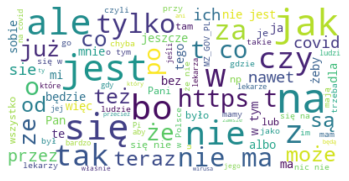

In [163]:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(cloud_texts)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# To Jsonl

In [164]:
{"text": "Terrible customer service.", "labels": ["negative"]}

{"text": "Really great transaction.", "labels": ["positive"]}

{"text": "Great price.", "labels": ["positive"]}

{'text': 'Great price.', 'labels': ['positive']}

In [165]:
path_or_buf="dataset.jsonl"
#texts.to_json(path_or_buf,orient='records',lines=True)

In [166]:
#x = pd.read_json(path_or_buf,lines=True)

In [167]:
x.text.str.len().sort_values()

36831    131
36830    132
36828    135
36829    135
36827    136
        ... 
4        362
3        365
2        367
1        369
0        377
Name: text, Length: 36832, dtype: int64

In [168]:
s = x.text.str.len().sort_values().index

In [169]:
x.index = x['text'].str.len()
x = x.sort_index(ascending=False).reset_index(drop=True)
x.to_json(path_or_buf,orient='records',lines=True)